In [51]:
import yfinance as yf
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [42]:
#Define ticker and dates
ticker = 'BTC-USD'
start_date = '2020-01-01'
end_date = '2023-11-27'

#Fetch prices
df = yf.download(ticker, start = start_date, end = end_date)

df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1426 entries, 2020-01-01 to 2023-11-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1426 non-null   float64
 1   High       1426 non-null   float64
 2   Low        1426 non-null   float64
 3   Close      1426 non-null   float64
 4   Adj Close  1426 non-null   float64
 5   Volume     1426 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 78.0 KB


In [44]:
df['Date'] = pd.to_datetime(df.index)

In [45]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997,2020-01-01
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,2020-01-02
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,2020-01-03
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,2020-01-04
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095,2020-01-05


In [46]:
import plotly.graph_objects as go

#Create candlestick chart
fig = go.Figure(data = [go.Candlestick(x=df['Date'],
                                      open = df['Open'],
                                      high = df['High'],
                                      low = df['Low'],
                                      close = df['Close'])])

#Customize chart layout
fig.update_layout(title = 'BTC Price', yaxis_title = 'Price', xaxis_rangeslider_visible = False)

fig.show()

<Axes: xlabel='Date'>

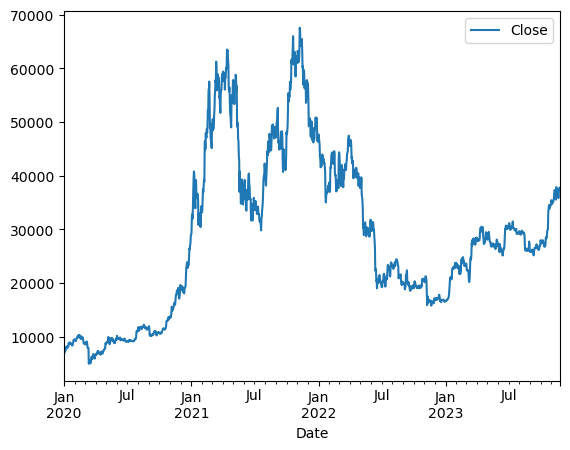

In [47]:
df.plot.line(y = 'Close', use_index = True)

In [76]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Split into features and target
X = df['Open'].values.reshape(-1, 1)
y = df['Close']

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = False)

#Random Forrest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state = 42)

#Train, fit and predict
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

#Evaluate using MSE
mean_squared_error(y_test, preds)

1573768.4976895473

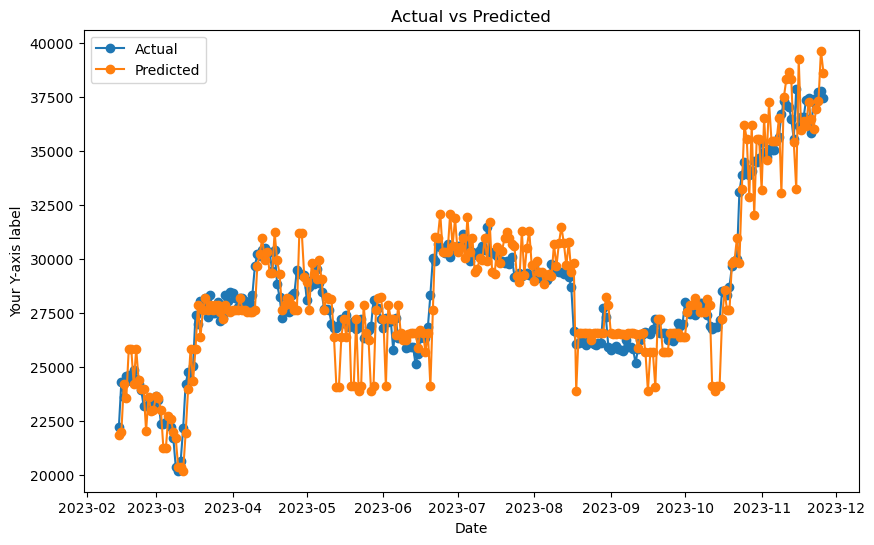

In [80]:
plt.figure(figsize=(10, 6))
#index_for_plotting = np.arange(len(X_test)) 
date_range = pd.date_range(start='2023-02-14', end='2023-11-26')

# Plotting actual values
plt.plot(date_range, y_test, label='Actual', marker='o')

# Plotting predicted values
plt.plot(date_range, preds, label='Predicted', marker='o')

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('Your Y-axis label')
plt.title('Actual vs Predicted')
plt.legend()

# Display the plot
plt.show()

In [81]:
len(date_range)

286

In [84]:
df = pd.DataFrame({
    'y_test': y_test,
    'preds': preds
})

df.head()

,y_test,preds
Date,,
2023-02-14,22220.804688,21820.646250
2023-02-15,24307.841797,21968.585703
2023-02-16,23623.474609,24190.962949
2023-02-17,24565.601562,23540.432578
2023-02-18,24641.277344,25841.275410
